In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [18]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [19]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [20]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [21]:
# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [27]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [29]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


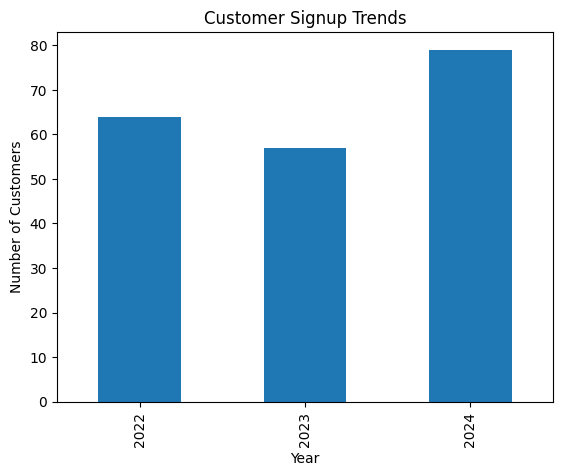

In [22]:
# Insight 1: Customer signup trends
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


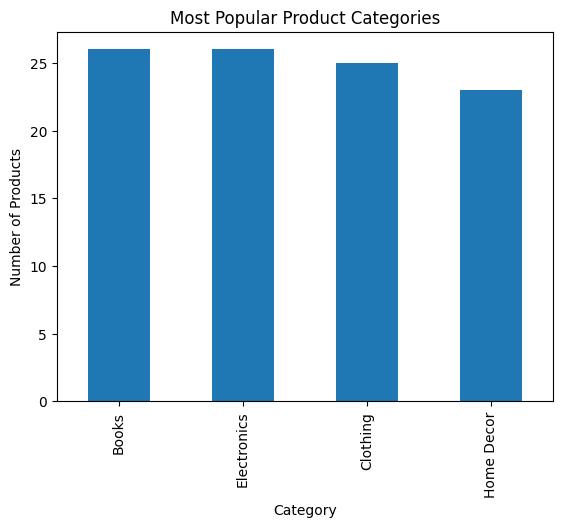

In [23]:
# Insight 2: Most popular product categories
popular_categories = products_df['Category'].value_counts()
popular_categories.plot(kind='bar', title='Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

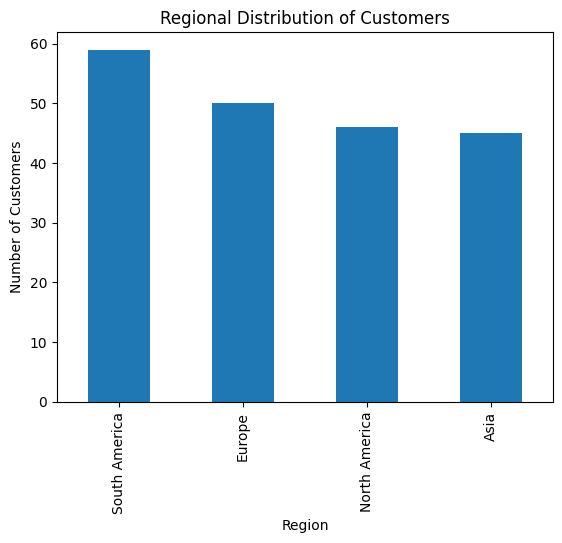

In [24]:
# Insight 3: Regional distribution of customers
regional_distribution = customers_df['Region'].value_counts()
regional_distribution.plot(kind='bar', title='Regional Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

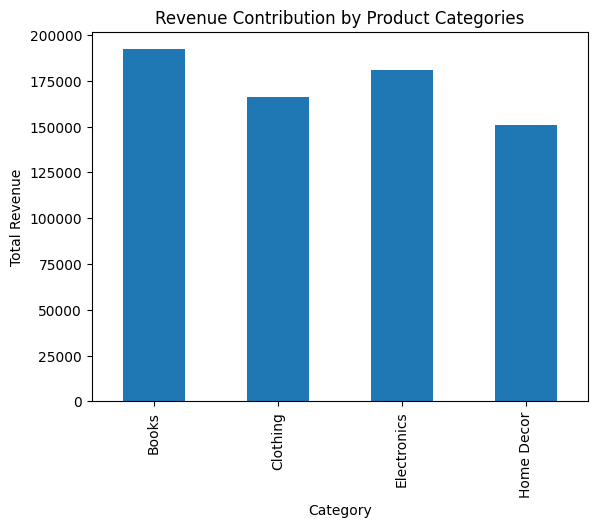

In [25]:
# Insight 4: Revenue contribution by product categories
merged_data = pd.merge(transactions_df, products_df, on='ProductID', how='inner')
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum()
revenue_by_category.plot(kind='bar', title='Revenue Contribution by Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

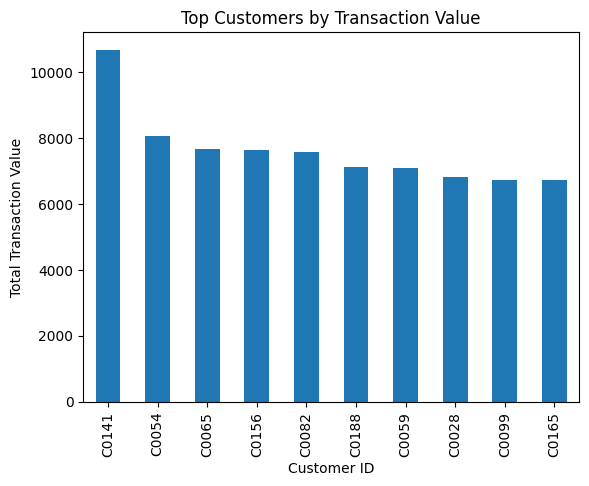

In [26]:
# Insight 5: Top customers by transaction value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top Customers by Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.show()